In [2]:
import spikeinterface as si
import matplotlib.pyplot as plt
%matplotlib inline
import spikeinterface.extractors as se
import spikeinterface.preprocessing as spre
import spikeinterface.sorters as ss
import spikeinterface.widgets as sw
import spikeinterface.qualitymetrics as sqm
import json
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
global_job_kwargs = dict(n_jobs = 4)
si.set_global_job_kwargs(**global_job_kwargs)

In [4]:
def spike_inf_formation(filepath):
    sorting_curated_phy = se.read_phy(filepath + "/phy_folder_for_kilosort/")
    spike_inf = np.column_stack((np.array(range(0, len(np.load(filepath + "/phy_folder_for_kilosort/spike_clusters.npy").astype(str)))).astype(str),
                                   np.load(filepath + "/phy_folder_for_kilosort/spike_clusters.npy"),
                                   np.load(filepath + "/kilosort4/sorter_output/spike_positions.npy"),
                                   np.load(filepath + "/phy_folder_for_kilosort/spike_templates.npy"),
                                   np.load(filepath + "/phy_folder_for_kilosort/spike_times.npy"),
                                   np.load(filepath + "/phy_folder_for_kilosort/amplitudes.npy")))
    spike_inf = pd.DataFrame(spike_inf)
    spike_inf.columns = ['name', 'cluster', 'position_1', 'position_2', 'template','time', 'amplitude']


    df_1 = pd.DataFrame(list(sorting_curated_phy.count_num_spikes_per_unit().items()), columns=["cluster", 'value'])
    df_1['value'] = df_1['value'].astype(int)
    df_1 = df_1.sort_values(by='value', ascending=False)

    df_2 = pd.DataFrame(np.unique(spike_inf['cluster'], return_counts=True)).T
    df_2.columns = ['cluster', 'value']
    df_2['value'] = df_2['value'].astype(int)
    df_2 = df_2.sort_values(by = 'value', ascending=False)

    spike_inf['cluster'] = spike_inf['cluster'].map(dict(zip(df_2['cluster'], df_1['cluster'])))

    sorting_curated_phy = se.read_phy(filepath + "/phy_folder_for_kilosort/", exclude_cluster_groups=['noise'])
    spike_inf = spike_inf[spike_inf['cluster'].isin(list(sorting_curated_phy.count_num_spikes_per_unit().keys()))]
    return sorting_curated_phy, spike_inf
    

/tmp/ipykernel_8923/1370686493.py:4: DeprecationWarning: `plot_probe_group` is deprecated and will be removed in 2.23. Use plot_probegroup instead
  plot_probe_group(probegroup=probe_30channel, with_device_index=True)


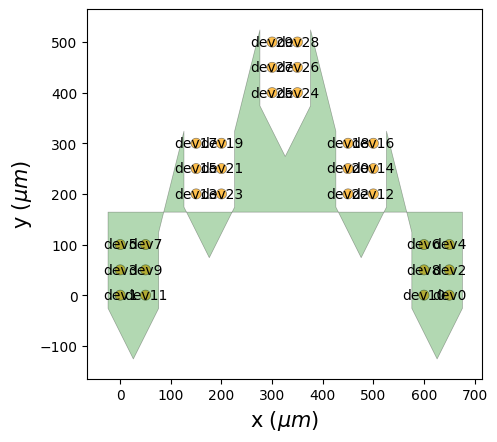

In [5]:
import probeinterface as pi
from probeinterface.plotting import plot_probe_group
probe_30channel = pi.read_probeinterface("/media/ubuntu/sda/data/probe.json")
plot_probe_group(probegroup=probe_30channel, with_device_index=True)

#### Check Similarity

- Channel position

In [6]:
def get_channel_id(data):
    x_embedding = float(data['position_1'])
    y_embedding = float(data['position_2'])
    if y_embedding <= 25:
        if x_embedding <= 25:
            return '2'
        elif 25 < x_embedding <= 75:
            return '12'
        elif 75 < x_embedding < 625:
            return '11'
        else:
            return '1'
    elif 25 < y_embedding <= 75:
        if x_embedding <= 25:
            return '4'
        elif 25 < x_embedding <= 75:
            return '10'
        elif 75 < x_embedding < 625:
            return '9'
        else:
            return '3'
    elif 75 < y_embedding <= 125:
        if x_embedding <= 25:
            return '6'
        elif 25 < x_embedding <= 75:
            return '8'
        elif 75 < x_embedding < 625:
            return '7'
        else:
            return '5'
    elif 125 < y_embedding <= 225:
        if 125 < x_embedding <= 175:
            return '14'
        elif 175 < x_embedding <= 225:
            return '24'
        elif 225 < x_embedding < 475:
            return '23'
        else:
            return '13'
    elif 225 < y_embedding <= 275:
        if 125 < x_embedding <= 175:
            return '16'
        elif 175 < x_embedding <= 225:
            return '22'
        elif 225 < x_embedding < 475:
            return '21'
        else:
            return '15'
    elif 275 < y_embedding <= 325:
        if 125 < x_embedding <= 175:
            return '18'
        elif 175 < x_embedding <= 225:
            return '20'
        elif 225 < x_embedding < 475:
            return '19'
        else:
            return '17'
    elif 325 < y_embedding <= 425:
        if 275 < x_embedding <= 325:
            return '26'
        else:
            return '25'
    elif 425 < y_embedding <= 475:
        if 275 < x_embedding <= 325:
            return '28'
        else:
            return '27'
    else:
        if 275 < x_embedding <= 325:
            return '30'
        else:
            return '29'
